# Text Visualization


In [1]:
import numpy as np

## Load 20 newsgroups dataset


In [2]:
import pickle as pkl
docs_raw = pkl.load(open('20news.pkl', 'rb'))

# WordCloud（词云） Visualization

WordCloud is a technique to show which words are the most frequent among the given text. The first thing you may want to do before using any functions is check out the docstring of the function, and see all required and optional arguments.

You can use the package <code>wordcloud</code> to create a WordCloud for your text:

1. First, you should install the package <code>pip install wordcloud</code>

2. Refer to the user document of this packge: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

- You can see that the only required argument for a WordCloud object is the text, while all others are optional.

- So now you can combine all documents into one big text and create a big fat cloud to see which characteristics are most common in all the documents

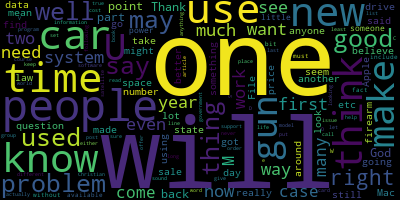

In [4]:
from wordcloud import WordCloud

# Generate a wordcloud
wordcloud = WordCloud().generate(' '.join(docs_raw))  

# Display the generated image
wordcloud.to_image()

Now, to make the wordcloud more clear, you can change some optional arguments of the WordCloud like stopwords, max_font_size, max_words, and background_color.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirito/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


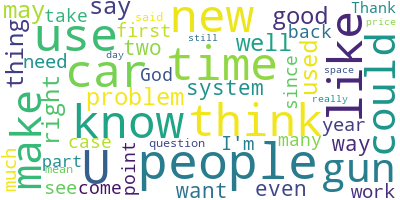

In [5]:
# TODO
import nltk
nltk.download('stopwords')
stopwords_english = nltk.corpus.stopwords.words('english')

wordcloud = WordCloud(stopwords=stopwords_english+['one', 'would', 'also', 'get'],
                     max_font_size=50, max_words=50, background_color="white").generate(' '.join(docs_raw))

# Display the generated image
wordcloud.to_image()

**Generate Chinese Wordcloud:**

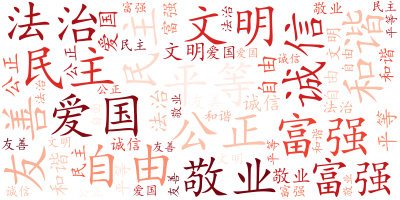

In [6]:
text = "富强 民主 文明 和谐 自由 平等 公正 法治 爱国 敬业 诚信 友善"

# TODO
# Generate a wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white",
                      font_path="Kaiti.ttf", repeat=True, colormap="Reds").generate(text)

# Display the generated image
wordcloud.to_image()


**Create a shape for your wordcloud:**

With the right mask, you can start making the wordcloud with your selected shape. Notice in the WordCloud function, there is a mask argument that takes in the transformed mask that you created above. 

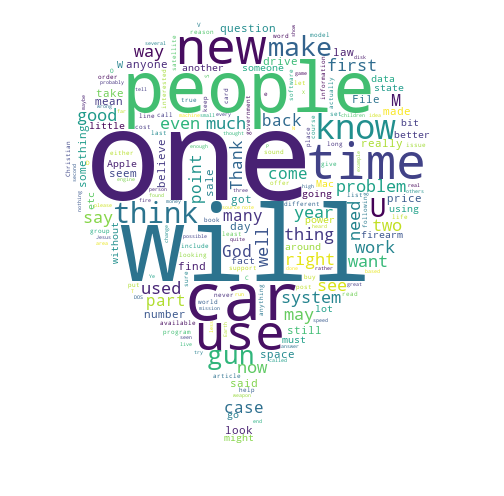

In [7]:
from PIL import Image

# read the mask / color image 
background_image = np.array(Image.open("background.jpeg"))

# TODO
wordcloud = WordCloud(
    mask=background_image,
    max_words=200,
    background_color='white'
)

# generate word cloud
wordcloud.generate(' '.join(docs_raw))

# Display the generated image
wordcloud.to_image()

Recolor wordcloud and show: we could give color_func=image_colors directly in the constructor



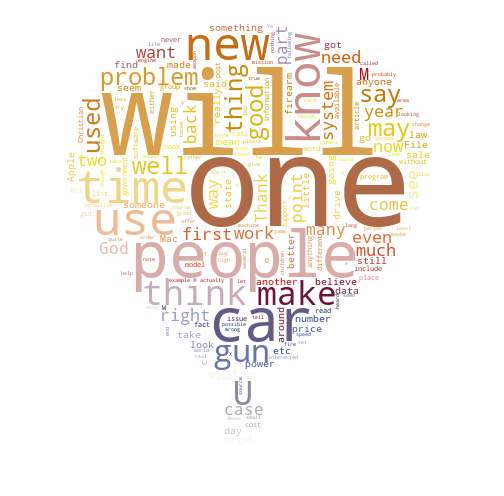

In [8]:
from wordcloud import ImageColorGenerator

# TODO

# read the mask / color image 
background_image = np.array(Image.open("background.jpeg"))

# TODO
wordcloud = WordCloud(
    mask=background_image,
    max_words=200,
    background_color='white'
)

# generate word cloud
wordcloud.generate(' '.join(docs_raw))


image_colors = ImageColorGenerator(background_image)
wordcloud.recolor(color_func=image_colors)


# Display the generated image
wordcloud.to_image()

**Generate the Chinese Wordcloud using the following text, and create a shape for your wordcloud using "ChinaMap.png"**

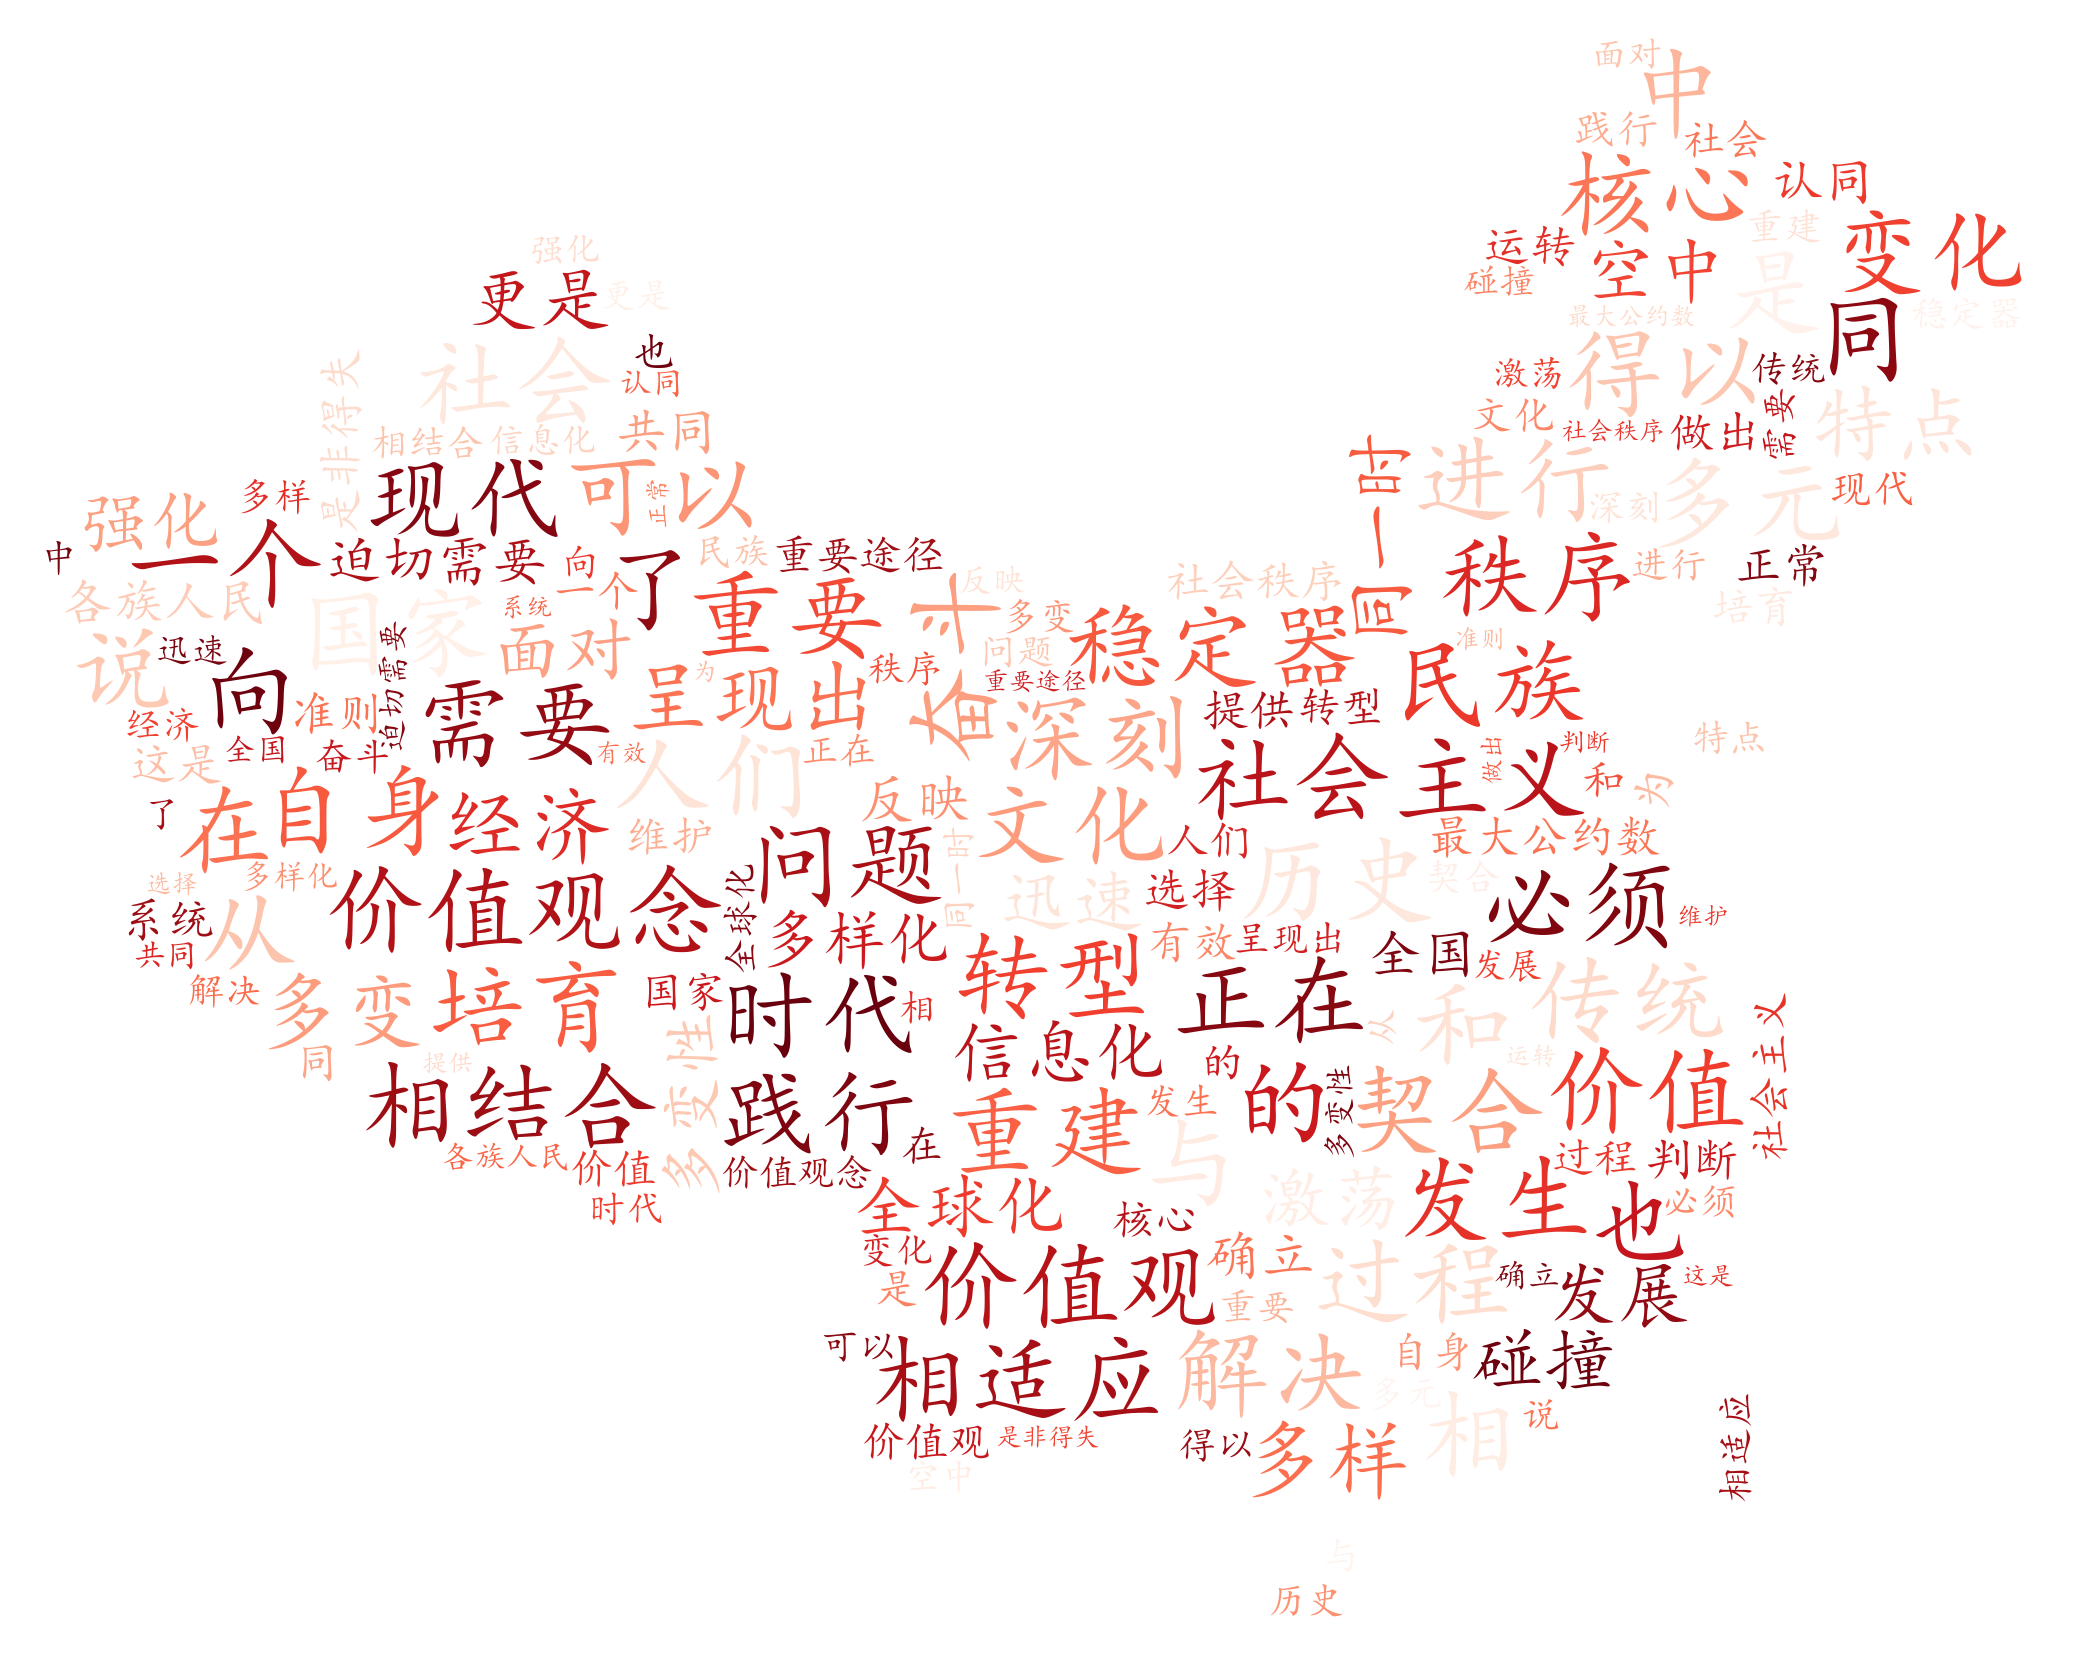

In [20]:
import jieba

text = "核心价值观是一个国家的重要稳定器。一个民族、一个国家的核心价值观必须同自身的历史文化相契合，\
    同自身正在进行的奋斗相结合，同自身需要解决的时代问题相适应。可以说，社会主义核心价值观培育和践行的过程，\
    也是转型社会重建现代价值秩序的过程。在社会从传统向现代的转型过程中，人们的价值观念也发生了深刻的变化，\
    呈现出多元、多样、多变的特点。经济全球化、社会信息化的迅速发展更是强化了多元文化与价值观在同一时空中的激荡与碰撞。\
    面对多样化和多变性的价值观念，迫切需要培育和践行社会主义核心价值观，确立反映全国各族人民共同认同的价值观“最大公约数”，\
    为人们判断是非得失、做出价值选择提供价值准则，这是社会系统得以正常运转、社会秩序得以有效维护的重要途径。"

text = " ".join(jieba.lcut(text))

# TODO
background_image = np.array(Image.open('ChinaMap.png'))

wordcloud = WordCloud(background_color='white',
                      max_words=150,
                      max_font_size=100,
                      repeat=True,
                      mask=background_image,
                      font_path='Kaiti.ttf',
                      colormap='Reds').generate(text)
wordcloud.generate(text)
wordcloud.to_image()

 * **Online tools**: Create WorldCloud via https://wordart.com/


# ThemeRiver（主题河流树）

ThemeRiver is a visualization that depicts thematic changes in a collection of documents over a period of time using a river metaphor.

* X-dimension: a serial unit of time

* Y-dimension: the "strength" of a theme in the collection of documents during time x


You can use the package <code>pyecharts</code> by <code>pip install pyecharts</code>


Refer to:  https://github.com/pyecharts/pyecharts


In [14]:
import pandas as pd

# Load data: toy example
data = pd.read_csv('topic.csv')

In [15]:
data

,date,num,topic
0,2015/11/8,10,主题1
1,2015/11/9,15,主题1
2,2015/11/10,35,主题1
3,2015/11/14,7,主题1
4,2015/11/15,2,主题1
...,...,...,...
100,2015/11/21,35,主题6
101,2015/11/22,40,主题6
102,2015/11/23,32,主题6
103,2015/11/24,26,主题6


ThemeRiver.add() signatures

add(name, data)
* name -> list
The chart name must be of type list, and each value in list is the kind of data.

* data -> [list] / [[], []]
Data item. In the data, each row is a "data item", and each column belongs to a "dimension". Each data item requires at least three dimensions, such as ['2015/11/08', 10, 'DQ'], respectively [time, value, type (legend name)]




In [28]:
from pyecharts.charts import ThemeRiver
import pyecharts.options as opts

data['date'] = pd.to_datetime(data['date'])
data_list = data.values.tolist()
series = ['主题1','主题2','主题3','主题4','主题5','主题6']

# 绘制，设置类型为时间
# wc = ThemeRiver(init_opts=opts.InitOpts(height='600px'))\
#     .add(series_name=series, data=data_list, singleaxis_opts=opts.SingleAxisOpts(type_='time'))\
#     .render('theme.html')
wc = ThemeRiver(init_opts=opts.InitOpts(height='600px'))\
    .add(series_name=series, data=data_list, singleaxis_opts=opts.SingleAxisOpts(type_='time'))\
    .render_notebook()

In [29]:
wc

In [33]:
import pyecharts
pyecharts.__version__
# 老师的版本是1.9.1，坐标轴上显示的就是日期而非数字，注意版本！

'2.0.2'